importing necessary libraries

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [373]:
df=pd.read_csv('avacado.csv',parse_dates=['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
df.shape

(16468, 14)

The given dataset contains 16468 rows & 14 columns.

we see that the given dataset consist of many rows with NaN value,which can be removed

In [375]:
#Removing blank rows
df.dropna(axis=0,inplace=True)

In [376]:
df.shape

(1517, 14)

After removal of all the blank rows ,the dataset contain 1517 rows & 14 columns

In [377]:
#dropping column unnamed,since it represent index
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [378]:
#checking columns name
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [379]:
df.rename(columns={'Total Volume':'total_volume','Total Bags':'total_bags','Small Bags':'small_bags','Large Bags':'large_bags','XLarge Bags':'xlarge_bags' },inplace=True)
df.columns

Index(['Date', 'AveragePrice', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

# Relevant columns in dataset

In [380]:
#checking the datatypes of column

df.dtypes

Date            datetime64[ns]
AveragePrice           float64
total_volume           float64
4046                   float64
4225                   float64
4770                   float64
total_bags             float64
small_bags             float64
large_bags             float64
xlarge_bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [381]:
#It will give Index, Datatype and Memory information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   total_volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   total_bags    1517 non-null   float64       
 7   small_bags    1517 non-null   float64       
 8   large_bags    1517 non-null   float64       
 9   xlarge_bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 165.9+ KB


# Checking Missing Values

In [382]:
df.isnull().sum()

Date            0
AveragePrice    0
total_volume    0
4046            0
4225            0
4770            0
total_bags      0
small_bags      0
large_bags      0
xlarge_bags     0
type            0
year            0
region          0
dtype: int64

We can also see this with the help of visualization for better clarity

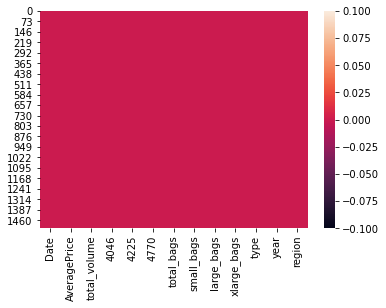

In [383]:
sns.heatmap(df.isnull())

Observation

we find that there are no missing values present in the dataset

# Summary Statistics

In [384]:
#it will give information about all the numerical column
df.describe()

,AveragePrice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation:-
    
1.Many outliers are present ,especially in Xlarge_bag(as large difference b\w 75% & max)

In [385]:
#Splitting date columns into day & month

df['month']=df['Date'].dt.month_name()
df['day']=df['Date'].dt.day_name()

In [386]:
df.drop('Date',axis=1,inplace=True)

In [387]:
df.columns

Index(['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

# Visualisation

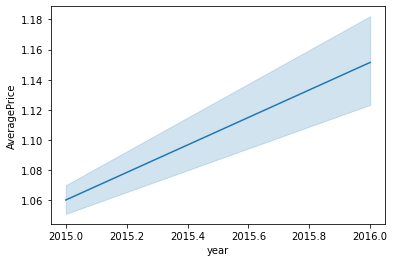

In [388]:
sns.lineplot(x='year',y='AveragePrice',data=df)

we see that avg price rises continuosly

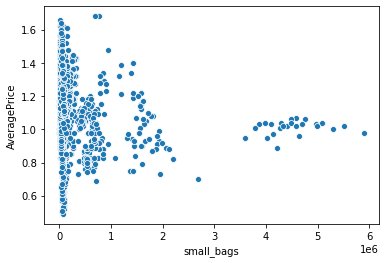

In [389]:
sns.scatterplot(x='small_bags',y='AveragePrice',data=df)

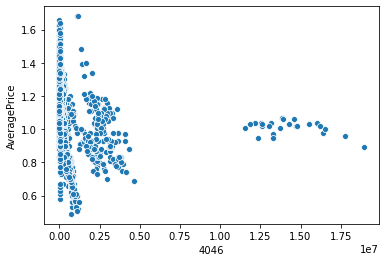

In [390]:
sns.scatterplot(x='4046',y='AveragePrice',data=df)

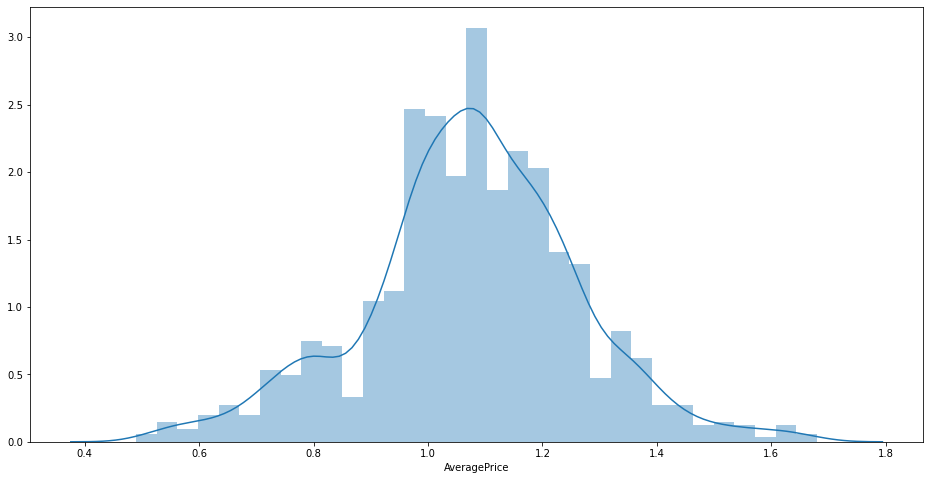

In [391]:
plt.figure(figsize=(16,8))
sns.distplot(a=df.AveragePrice)


Average Price distribution shows that for most cases price of avocado is between 1.0, 1.3

In [392]:
df.columns

Index(['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

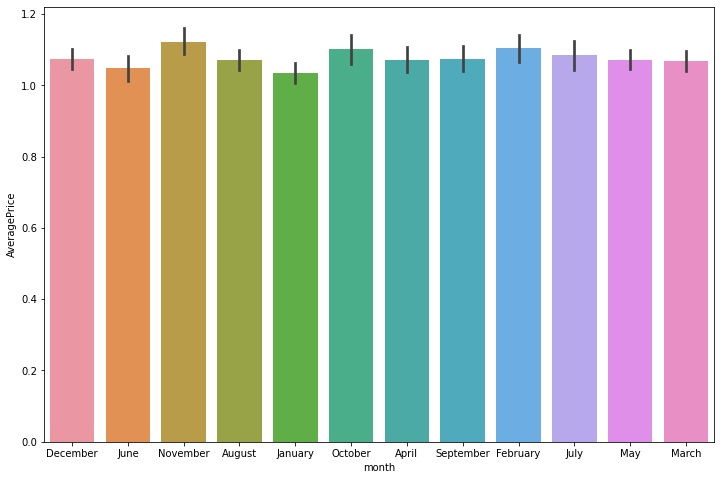

In [393]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='AveragePrice',data=df)

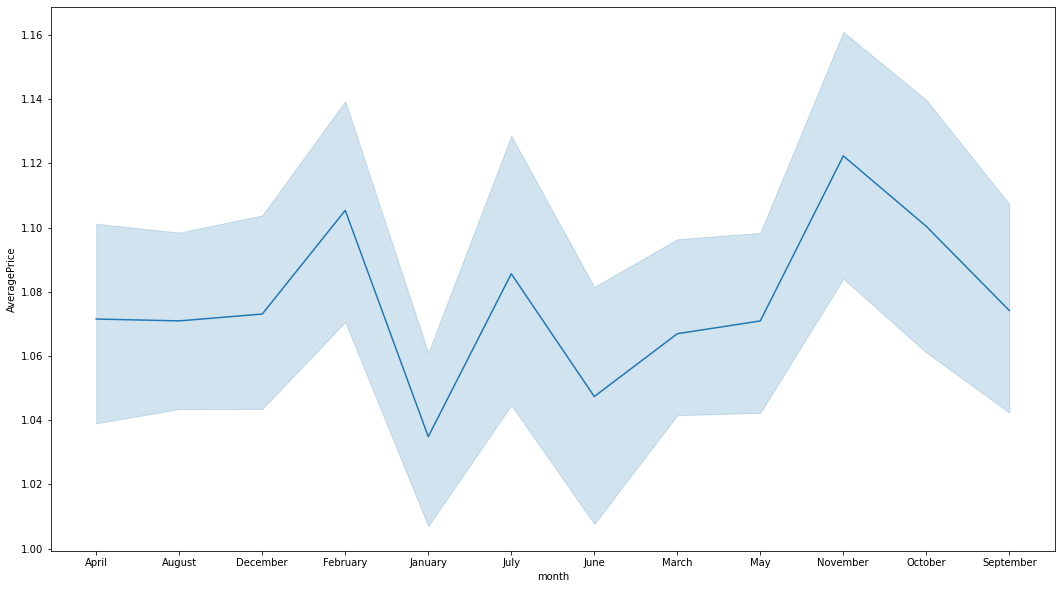

In [394]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", data=df)
plt.show()

we see that avg price rises in the month of october,november,but overall the prive of avocado is high throughout the year

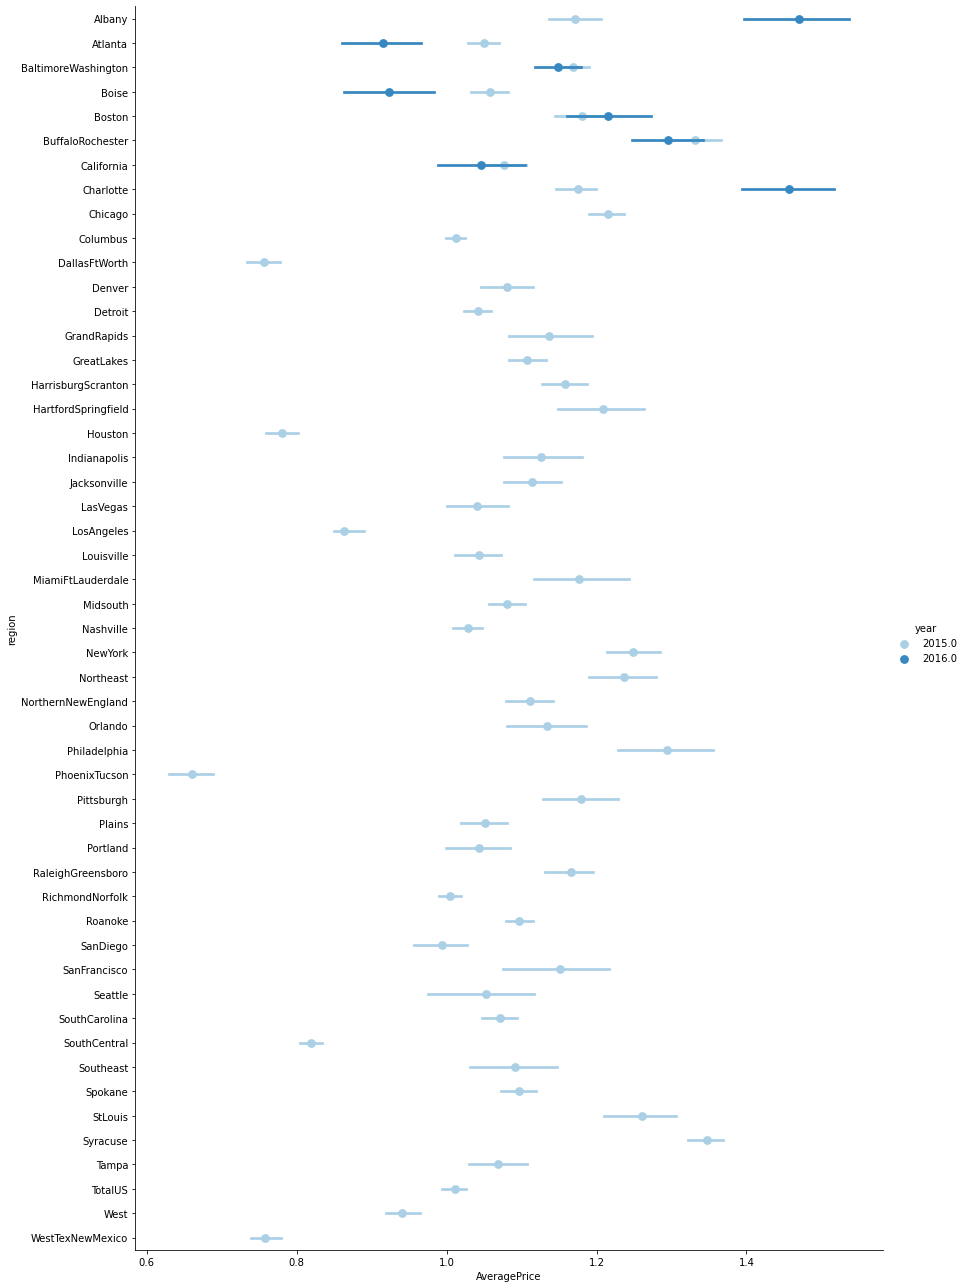

In [395]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Looks like there was a huge increase in Avocado prices in Year 2016 in Albany & Charlotte region

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CEC1B1DC0>,
      dtype=object)

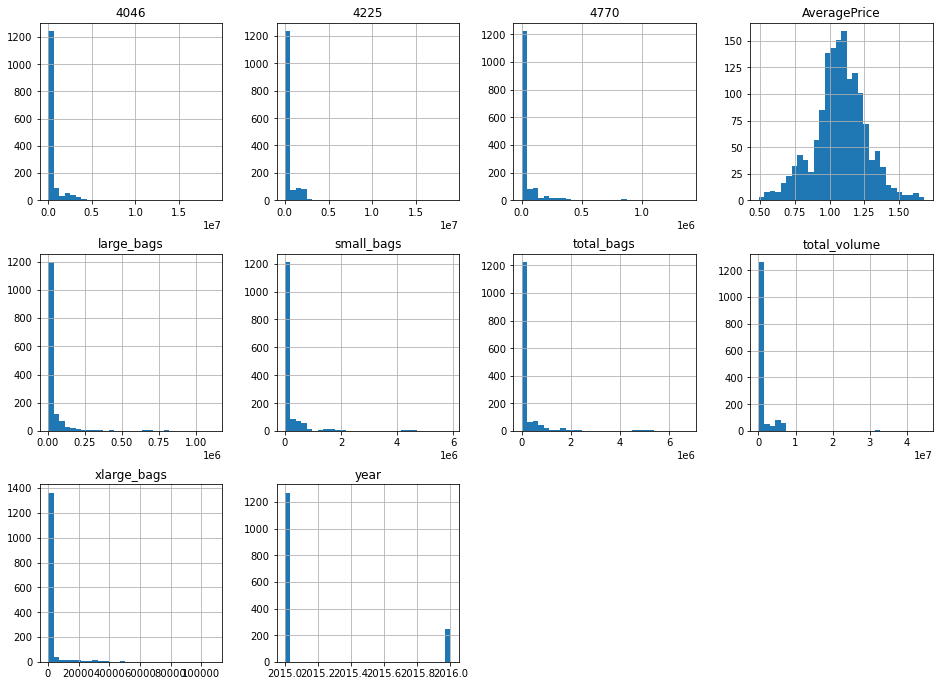

In [396]:
df.hist(figsize=(16,16),grid=True,layout=(4,4),bins=30)

# check corelation

In [397]:
df.corr()

,AveragePrice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
total_volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
total_bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
small_bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
large_bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
xlarge_bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


Here we see corelation between various column

For better clarity ,we check it via VISUALISATION

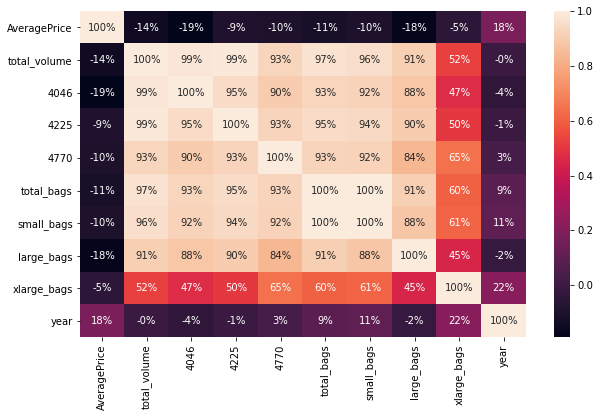

In [398]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

from above heatmap ,we find that all the Features are not much correleted with the Average Price column, instead most of them are correlated with each other.

In [399]:
df['region'].nunique()


51

In [400]:
# we can drop type,as type is conventional for all rows
df.drop(['type','day'],axis=1,inplace=True)

# checking Skewness

In [401]:
skew=df.skew()
skew

AveragePrice   -0.109444
total_volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
total_bags      5.366378
small_bags      5.355185
large_bags      5.144495
xlarge_bags     5.775077
year            1.828332
dtype: float64

we notice that the data is highly skewed

In [402]:
skew=['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags']

In [403]:
#remove skewness
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
        
df.skew()

AveragePrice   -0.109444
total_volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
total_bags      0.695502
small_bags      0.713843
large_bags     -0.912766
xlarge_bags     0.783913
year            1.828332
dtype: float64

In [404]:
df.columns

Index(['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'year', 'region', 'month'],
      dtype='object')

In [405]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [406]:
list=['month','region']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
    


# checking outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
total_volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
total_bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
small_bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
large_bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
xlarge_bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
region          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
month           AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

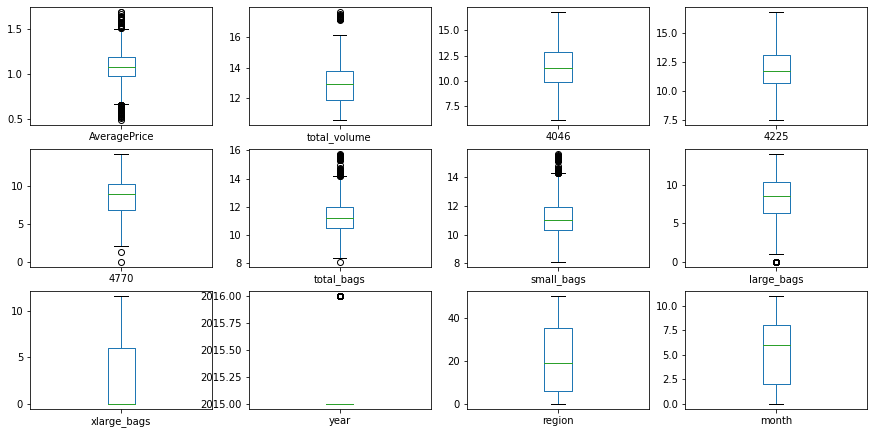

In [407]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

from above we find that outliers are present in almost all columns

In [408]:
#removing outliers

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(1517, 12)
(1502, 12)


# Making prediction by taking Average Price as an output variable by using Regression Technique

# Model Training

1st seperating input and output variable

In [409]:
x=df_new.drop(['AveragePrice'],axis=1)
x.shape

(1502, 11)

In [410]:
y=df_new['AveragePrice']
y.shape

(1502,)

In [411]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [412]:
#lets again check skewness
x.skew()

0     0.592040
1    -0.203940
2     0.122951
3    -0.371693
4     0.621617
5     0.643635
6    -0.934829
7     0.796336
8     1.838704
9     0.294168
10   -0.013890
dtype: float64

In [413]:
#Breaking input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [414]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (1201, 11)
x_test_shape: (301, 11)
y_train_shape: (1201,)
y_test_shape: (301,)


In [415]:
#importing our models library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [416]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score:',r2_score(y_test,predm))
    print('************************************************************************************')
    print('\n')

score of  LinearRegression() is: 0.38480470384513155
Error:
mean absolute error: 0.10988996550078596
mean squared error: 0.018879011282549672
root mean squared error: 0.13740091441671584
r2 score: 0.4402891585802058
************************************************************************************


score of  DecisionTreeRegressor() is: 1.0
Error:
mean absolute error: 0.06980066445182724
mean squared error: 0.00923222591362126
root mean squared error: 0.09608447280191144
r2 score: 0.7262898540101559
************************************************************************************


score of  KNeighborsRegressor() is: 0.8138505149589575
Error:
mean absolute error: 0.06980066445182725
mean squared error: 0.008421488372093021
root mean squared error: 0.09176866770359599
r2 score: 0.7503259957735132
************************************************************************************


score of  SVR() is: 0.7920373391234258
Error:
mean absolute error: 0.07517470523328969
mean squared e

In [417]:
#cross validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of ',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('******************************************************')
    print('\n')

score of  LinearRegression() is:
score: [-0.22812462  0.12358775  0.37529804  0.20918381  0.15731528]
mean score: 0.12745205104829188
standard deviation: 0.19771152176043383
******************************************************


score of  DecisionTreeRegressor() is:
score: [-2.04348861 -0.41514541 -0.41077749 -0.54728602  0.00442168]
mean score: -0.6824551683041788
standard deviation: 0.7053716461623488
******************************************************


score of  KNeighborsRegressor() is:
score: [-0.28064016  0.24574204 -0.04223977  0.08155058  0.28915568]
mean score: 0.058713674532206106
standard deviation: 0.2068609542510242
******************************************************


score of  SVR() is:
score: [-0.06633527  0.46691368  0.50391176  0.11496932  0.13125732]
mean score: 0.23014336210579858
standard deviation: 0.21997836634055137
******************************************************


score of  Lasso() is:
score: [-0.1500728  -0.02498071 -0.01153593 -0.02054949 -0.0

In [418]:
#Decision TreeRegressor is giving the best result,so finding its best parameter using GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters={'criterion':['mae','friedman_mse','mse'],'random_state':range(30,100)}
dtc=DecisionTreeRegressor()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'random_state': 73}


In [419]:
#using decision tree model with best paramters

dtc=DecisionTreeRegressor(criterion='friedman_mse',random_state=73)
dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)
print('score:',dtc.score(x_train,y_train))
print('r2_score',r2_score(y_test,dtc_pred))
print('mean_squared_error',mean_squared_error(y_test,dtc_pred))
print('mean_absolute_error',mean_absolute_error(y_test,dtc_pred))

score: 1.0
r2_score 0.7153174151806663
mean_squared_error 0.009602325581395347
mean_absolute_error 0.06966777408637874


In [420]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5,scoring='r2')
print('score:',score)
print('mean score:',score.mean())
print('standard deviation:',score.std())

score: [-0.84382714 -0.46147714 -0.29454669 -0.20476493 -0.01087798]
mean score: -0.36309877413911085
standard deviation: 0.28092936672464797


# using ensemble technique to boostup our score

In [421]:
#using Adaboost
from sklearn.ensemble import AdaBoostRegressor

dtc=DecisionTreeRegressor()
ada=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,random_state=73)

ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print('score:',ada.score(x_train,y_train))
print('r2_score',r2_score(y_test,predada))
print('mean_squared_error',mean_squared_error(y_test,predada))
print('mean_absolute_error',mean_absolute_error(y_test,predada))

score: 0.9986307890685252
r2_score 0.8224513623515446
mean_squared_error 0.005988704318936875
mean_absolute_error 0.055016611295681056


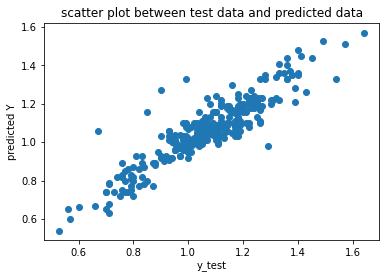

In [422]:
#plotting scatter plot between test data & predicted data for adaboost

plt.scatter(y_test,predada)
plt.xlabel('y_test')
plt.ylabel('predicted Y')
plt.title('scatter plot between test data and predicted data')
plt.show()

In [423]:
#saving AdaBoostRegressor

import joblib
joblib.dump(ada,'avocado.pkl')

['avocado.pkl']